# Project Title
### Data Engineering Capstone Project

#### Project Summary
--describe your project at a high level--

The project follows the follow steps:
* Step 1: Scope the Project and Gather Data
* Step 2: Explore and Assess the Data
* Step 3: Define the Data Model
* Step 4: Run ETL to Model the Data
* Step 5: Complete Project Write Up

In [1]:
# Do all imports and installs here
import logging
import numpy as np
import pandas as pd
import psycopg2
from pprint import pprint
import configparser
import psycopg2
import pandas as pd
pd.set_option('display.max_columns', None)
import os
from pyspark.sql import SparkSession, DataFrame
from pyspark.sql.types import StructType as R, StructField as Fld, DoubleType as Dbl, StringType as Str, IntegerType as Int, DateType as Date
from collections import OrderedDict 
from datetime import datetime, timedelta

logging.basicConfig(level=logging.INFO, format='%(asctime)s %(levelname)s  [%(name)s] %(message)s')
LOG = logging.getLogger('etl')

### Step 1: Scope the Project and Gather Data

#### Scope 
Explain what you plan to do in the project in more detail. What data do you use? What is your end solution look like? What tools did you use? etc>

#### Describe and Gather Data 
Describe the data sets you're using. Where did it come from? What type of information is included? 

In [2]:
# Read in the data here
imm_sample = pd.read_csv('./immigration_data_sample.csv')
imm_sample.head()
imm_header = list(imm_sample.head(0))
imm_header = imm_header[1:]
pprint(imm_header)

['cicid',
 'i94yr',
 'i94mon',
 'i94cit',
 'i94res',
 'i94port',
 'arrdate',
 'i94mode',
 'i94addr',
 'depdate',
 'i94bir',
 'i94visa',
 'count',
 'dtadfile',
 'visapost',
 'occup',
 'entdepa',
 'entdepd',
 'entdepu',
 'matflag',
 'biryear',
 'dtaddto',
 'gender',
 'insnum',
 'airline',
 'admnum',
 'fltno',
 'visatype']


In [3]:
# .config("spark.jars.packages","org.apache.hadoop:hadoop-aws:2.7.0") \
from pyspark.sql import SparkSession
spark = SparkSession.builder \
                     .config("spark.jars.packages", "saurfang:spark-sas7bdat:3.0.0-s_2.12") \
                    .enableHiveSupport() \
                    .getOrCreate()
# df_spark =spark.read.format('com.github.saurfang.sas.spark').load('../../data/18-83510-I94-Data-2016/i94_apr16_sub.sas7bdat')

In [4]:
#write to parquet
# df_spark.write.parquet("sas_data")
# df_spark=spark.read.parquet("sas_data")

### Step 2: Explore and Assess the Data
#### Explore the Data 
Identify data quality issues, like missing values, duplicate data, etc.

#### Cleaning Steps
Document steps necessary to clean the data

# Performing cleaning tasks here
* Checkout i94 2016 data
* Checkout demographics data
* Checkout airport data
* Checkout temperature data

## i94 data

In [5]:
i94_fnames=['./data/18-83510-I94-Data-2016/i94_jan16_sub.sas7bdat',
            './data/18-83510-I94-Data-2016/i94_feb16_sub.sas7bdat',
            './data/18-83510-I94-Data-2016/i94_mar16_sub.sas7bdat',
            './data/18-83510-I94-Data-2016/i94_apr16_sub.sas7bdat',
            './data/18-83510-I94-Data-2016/i94_may16_sub.sas7bdat',
            './data/18-83510-I94-Data-2016/i94_jun16_sub.sas7bdat',
            './data/18-83510-I94-Data-2016/i94_jul16_sub.sas7bdat',
            './data/18-83510-I94-Data-2016/i94_aug16_sub.sas7bdat',
            './data/18-83510-I94-Data-2016/i94_sep16_sub.sas7bdat',
            './data/18-83510-I94-Data-2016/i94_oct16_sub.sas7bdat',
            './data/18-83510-I94-Data-2016/i94_nov16_sub.sas7bdat',
            './data/18-83510-I94-Data-2016/i94_dec16_sub.sas7bdat']

In [6]:
# Examine i94 data
df_i94s = OrderedDict() 
for f in i94_fnames:
    fname = os.path.basename(f)
    print(fname)
    d = spark.read.format('com.github.saurfang.sas.spark').load(f)
    df_i94s[fname] = d
#     df_i.printSchema()
#     df_i.show(1)

i94_jan16_sub.sas7bdat
i94_feb16_sub.sas7bdat
i94_mar16_sub.sas7bdat
i94_apr16_sub.sas7bdat
i94_may16_sub.sas7bdat
i94_jun16_sub.sas7bdat
i94_jul16_sub.sas7bdat
i94_aug16_sub.sas7bdat
i94_sep16_sub.sas7bdat
i94_oct16_sub.sas7bdat
i94_nov16_sub.sas7bdat
i94_dec16_sub.sas7bdat


In [7]:
for k, v in df_i94s.items():
#     df.printSchema()
    LOG.info(f"i94 fname: {k}, df: {v}")
# DataFrame[cicid: double, i94yr: double, i94mon: double, i94cit: double, i94res: double, i94port: string, arrdate: double, i94mode: double, i94addr: string, depdate: double, i94bir: double, i94visa: double, count: double, dtadfile: string, visapost: string, occup: string, entdepa: string, entdepd: string, entdepu: string, matflag: string, biryear: double, dtaddto: string, gender: string, insnum: string, airline: string, admnum: double, fltno: string, visatype: string]

2020-09-29 23:53:19,117 INFO  [etl] i94 fname: i94_jan16_sub.sas7bdat, df: DataFrame[cicid: double, i94yr: double, i94mon: double, i94cit: double, i94res: double, i94port: string, arrdate: double, i94mode: double, i94addr: string, depdate: double, i94bir: double, i94visa: double, count: double, dtadfile: string, visapost: string, occup: string, entdepa: string, entdepd: string, entdepu: string, matflag: string, biryear: double, dtaddto: string, gender: string, insnum: string, airline: string, admnum: double, fltno: string, visatype: string]
2020-09-29 23:53:19,140 INFO  [etl] i94 fname: i94_feb16_sub.sas7bdat, df: DataFrame[cicid: double, i94yr: double, i94mon: double, i94cit: double, i94res: double, i94port: string, arrdate: double, i94mode: double, i94addr: string, depdate: double, i94bir: double, i94visa: double, count: double, dtadfile: string, visapost: string, occup: string, entdepa: string, entdepd: string, entdepu: string, matflag: string, biryear: double, dtaddto: string, gend

In [8]:
# Clean i94 data: Drop extra columns from jun i94: validres, delete_days, delete_mexl, delete_dup, delete_visa
tmp = df_i94s['i94_jun16_sub.sas7bdat']
tmp.printSchema()
tmp.show(2)
columns_to_drop = ['validres', 'delete_days', 'delete_mexl', 'delete_dup', 'delete_visa', 'delete_recdup']
df_i94s['i94_jun16_sub.sas7bdat'] = tmp.drop(*columns_to_drop)
df_i94s['i94_jun16_sub.sas7bdat'].printSchema()
df_i94s['i94_jun16_sub.sas7bdat'].show(2)

root
 |-- cicid: double (nullable = true)
 |-- i94yr: double (nullable = true)
 |-- i94mon: double (nullable = true)
 |-- i94cit: double (nullable = true)
 |-- i94res: double (nullable = true)
 |-- i94port: string (nullable = true)
 |-- arrdate: double (nullable = true)
 |-- i94mode: double (nullable = true)
 |-- i94addr: string (nullable = true)
 |-- depdate: double (nullable = true)
 |-- i94bir: double (nullable = true)
 |-- i94visa: double (nullable = true)
 |-- count: double (nullable = true)
 |-- validres: double (nullable = true)
 |-- delete_days: double (nullable = true)
 |-- delete_mexl: double (nullable = true)
 |-- delete_dup: double (nullable = true)
 |-- delete_visa: double (nullable = true)
 |-- delete_recdup: double (nullable = true)
 |-- dtadfile: string (nullable = true)
 |-- visapost: string (nullable = true)
 |-- occup: string (nullable = true)
 |-- entdepa: string (nullable = true)
 |-- entdepd: string (nullable = true)
 |-- entdepu: string (nullable = true)
 |-- mat

In [9]:
# double check after data clean
for k, v in df_i94s.items():
#     LOG.info(f"i94 fname: {k}, df: {v}")
    print(k)
    v.show(5)

i94_jan16_sub.sas7bdat
+-----+------+------+------+------+-------+-------+-------+-------+-------+------+-------+-----+--------+--------+-----+-------+-------+-------+-------+-------+--------+------+------+-------+------------+-----+--------+
|cicid| i94yr|i94mon|i94cit|i94res|i94port|arrdate|i94mode|i94addr|depdate|i94bir|i94visa|count|dtadfile|visapost|occup|entdepa|entdepd|entdepu|matflag|biryear| dtaddto|gender|insnum|airline|      admnum|fltno|visatype|
+-----+------+------+------+------+-------+-------+-------+-------+-------+------+-------+-----+--------+--------+-----+-------+-------+-------+-------+-------+--------+------+------+-------+------------+-----+--------+
|  7.0|2016.0|   1.0| 101.0| 101.0|    BOS|20465.0|    1.0|     MA|   null|  20.0|    3.0|  1.0|    null|    null| null|      T|   null|   null|   null| 1996.0|     D/S|     M|  null|     LH|3.46608285E8|  424|      F1|
|  8.0|2016.0|   1.0| 101.0| 101.0|    BOS|20465.0|    1.0|     MA|   null|  20.0|    3.0|  1.0| 

In [10]:
# define sample rate so that each month got same # of rows in union i94 df.
## get file size of each month i94 by ../../data/18-83510-I94-Data-2016/
# i94_filesizes = [415, 374, 459, 451, 501, 684, 620, 597, 543, 531, 424, 500]
# i94_samplerate = []
# N = 5
# for i in i94_filesizes:
#     i94_samplerate.append(N/i)
# print(i94_samplerate)

# i94_samplerate_dict = {}
# i = 0
# for k in df_i94s.keys():
#     i94_samplerate_dict[k] = i94_samplerate[i]
#     i = i+1
# pprint(i94_samplerate_dict)

In [36]:
# sample 1% of each month of i94, since origin size of sas is around 500MB.
sample_rate = 0.1
df_i94s_sample = {}
for k, v in df_i94s.items():
    df_i94s_sample[k] = v.sample(sample_rate)
    # (i94_samplerate_dict[k])
    
from functools import reduce
print(len(df_i94s_sample.values()))
df_i94s_sample_unionall = reduce(DataFrame.unionAll, df_i94s_sample.values())

df_i94s_sample_unionall.printSchema()

12
root
 |-- cicid: double (nullable = true)
 |-- i94yr: double (nullable = true)
 |-- i94mon: double (nullable = true)
 |-- i94cit: double (nullable = true)
 |-- i94res: double (nullable = true)
 |-- i94port: string (nullable = true)
 |-- arrdate: double (nullable = true)
 |-- i94mode: double (nullable = true)
 |-- i94addr: string (nullable = true)
 |-- depdate: double (nullable = true)
 |-- i94bir: double (nullable = true)
 |-- i94visa: double (nullable = true)
 |-- count: double (nullable = true)
 |-- dtadfile: string (nullable = true)
 |-- visapost: string (nullable = true)
 |-- occup: string (nullable = true)
 |-- entdepa: string (nullable = true)
 |-- entdepd: string (nullable = true)
 |-- entdepu: string (nullable = true)
 |-- matflag: string (nullable = true)
 |-- biryear: double (nullable = true)
 |-- dtaddto: string (nullable = true)
 |-- gender: string (nullable = true)
 |-- insnum: string (nullable = true)
 |-- airline: string (nullable = true)
 |-- admnum: double (nullable

In [37]:
df_i94s_sample_unionall.write.mode('overwrite').parquet(path='i94_sample.parquet')

In [16]:
# df_i94s_sample_unionall.createOrReplaceTempView("i94")
# play = spark.sql("""
# select distinct cicid,
#                 i94mon,
#                 i94cit,
#                 airline,
#                 visatype
# from i94
# """)
# play.printSchema()
# play.show(5)

In [38]:
%%time
df_sas = spark.read.parquet('sas_data/')
df_sas.count()

CPU times: user 2.89 ms, sys: 203 µs, total: 3.09 ms
Wall time: 363 ms


3096313

In [45]:
%%time
df_imm = spark.read.parquet('i94_sample.parquet/')
df_imm.count()
df_imm.printSchema()
df_imm.show()

root
 |-- cicid: double (nullable = true)
 |-- i94yr: double (nullable = true)
 |-- i94mon: double (nullable = true)
 |-- i94cit: double (nullable = true)
 |-- i94res: double (nullable = true)
 |-- i94port: string (nullable = true)
 |-- arrdate: double (nullable = true)
 |-- i94mode: double (nullable = true)
 |-- i94addr: string (nullable = true)
 |-- depdate: double (nullable = true)
 |-- i94bir: double (nullable = true)
 |-- i94visa: double (nullable = true)
 |-- count: double (nullable = true)
 |-- dtadfile: string (nullable = true)
 |-- visapost: string (nullable = true)
 |-- occup: string (nullable = true)
 |-- entdepa: string (nullable = true)
 |-- entdepd: string (nullable = true)
 |-- entdepu: string (nullable = true)
 |-- matflag: string (nullable = true)
 |-- biryear: double (nullable = true)
 |-- dtaddto: string (nullable = true)
 |-- gender: string (nullable = true)
 |-- insnum: string (nullable = true)
 |-- airline: string (nullable = true)
 |-- admnum: double (nullable = 

In [40]:
staging_imm = df_imm.createOrReplaceTempView("imm")

In [41]:
imm_table = spark.sql("""
select distinct i94mon, COUNT(*)
FROM imm
GROUP BY 1
ORDER BY 1 asc
""")
imm_table.printSchema()
imm_table.show()
LOG.info(f"total 1% sample parquet rows: {imm_table.count()}")

root
 |-- i94mon: double (nullable = true)
 |-- count(1): long (nullable = false)

+------+--------+
|i94mon|count(1)|
+------+--------+
|   1.0|  284968|
|   2.0|  257999|
|   3.0|  315522|
|   4.0|  310147|
|   5.0|  344054|
|   6.0|  356638|
|   7.0|  427332|
|   8.0|  410803|
|   9.0|  374449|
|  10.0|  364811|
|  11.0|  291295|
|  12.0|  343157|
+------+--------+



2020-09-30 00:31:04,451 INFO  [etl] total 1% sample parquet rows: 12


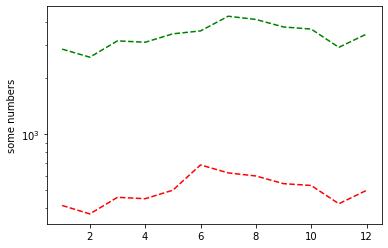

In [43]:
import matplotlib.pyplot as plt
t = [1,2,3,4,5,6,7,8,9,10,11,12]
filesize_in_MB = [415 ,374 ,459 ,451 ,501 ,684 ,620 ,597 ,543 ,531 ,424 ,500]
sample_in_rows = [284968,257999,315522,310147,344054,356638,427332,410803,374449,364811,291295,343157] 
sample_in_rows_lower = [s/100 for s in sample_in_rows ]
plt.plot(t, filesize_in_MB, 'r--', t, sample_in_rows_lower, 'g--' )
plt.ylabel('some numbers')
plt.yscale('log')
plt.show()

## Extract i94 table from dataframe

In [44]:
staging_imm = df_imm.createOrReplaceTempView("imm")

In [ ]:
i94_table = spark.sql("""
SELECT
    DISTINCT 
FROM imm
""")

## demographics data

In [31]:
df_degh = spark.read.options(header='True',inferSchema='True',sep=';').csv('./us-cities-demographics.csv')
df_degh.printSchema()
df_degh.show(5)

root
 |-- City: string (nullable = true)
 |-- State: string (nullable = true)
 |-- Median Age: double (nullable = true)
 |-- Male Population: integer (nullable = true)
 |-- Female Population: integer (nullable = true)
 |-- Total Population: integer (nullable = true)
 |-- Number of Veterans: integer (nullable = true)
 |-- Foreign-born: integer (nullable = true)
 |-- Average Household Size: double (nullable = true)
 |-- State Code: string (nullable = true)
 |-- Race: string (nullable = true)
 |-- Count: integer (nullable = true)

+----------------+-------------+----------+---------------+-----------------+----------------+------------------+------------+----------------------+----------+--------------------+-----+
|            City|        State|Median Age|Male Population|Female Population|Total Population|Number of Veterans|Foreign-born|Average Household Size|State Code|                Race|Count|
+----------------+-------------+----------+---------------+-----------------+-------------

## Checkout airport data

In [32]:
df_air = spark.read.options(header='True',inferSchema='True').csv('./airport-codes_csv.csv')
df_air.printSchema()
df_air.show(5)

root
 |-- ident: string (nullable = true)
 |-- type: string (nullable = true)
 |-- name: string (nullable = true)
 |-- elevation_ft: integer (nullable = true)
 |-- continent: string (nullable = true)
 |-- iso_country: string (nullable = true)
 |-- iso_region: string (nullable = true)
 |-- municipality: string (nullable = true)
 |-- gps_code: string (nullable = true)
 |-- iata_code: string (nullable = true)
 |-- local_code: string (nullable = true)
 |-- coordinates: string (nullable = true)

+-----+-------------+--------------------+------------+---------+-----------+----------+------------+--------+---------+----------+--------------------+
|ident|         type|                name|elevation_ft|continent|iso_country|iso_region|municipality|gps_code|iata_code|local_code|         coordinates|
+-----+-------------+--------------------+------------+---------+-----------+----------+------------+--------+---------+----------+--------------------+
|  00A|     heliport|   Total Rf Heliport|   

## Checkout temperature data

In [33]:
df_tmpt = spark.read.options(header='True', inferSchema='True').csv('./GlobalLandTemperaturesByCity.csv')
df_tmpt.printSchema()
df_tmpt.show(5)

root
 |-- dt: timestamp (nullable = true)
 |-- AverageTemperature: double (nullable = true)
 |-- AverageTemperatureUncertainty: double (nullable = true)
 |-- City: string (nullable = true)
 |-- Country: string (nullable = true)
 |-- Latitude: string (nullable = true)
 |-- Longitude: string (nullable = true)

+-------------------+------------------+-----------------------------+-----+-------+--------+---------+
|                 dt|AverageTemperature|AverageTemperatureUncertainty| City|Country|Latitude|Longitude|
+-------------------+------------------+-----------------------------+-----+-------+--------+---------+
|1743-11-01 00:00:00|             6.068|           1.7369999999999999|Århus|Denmark|  57.05N|   10.33E|
|1743-12-01 00:00:00|              null|                         null|Århus|Denmark|  57.05N|   10.33E|
|1744-01-01 00:00:00|              null|                         null|Århus|Denmark|  57.05N|   10.33E|
|1744-02-01 00:00:00|              null|                         n

### Step 3: Define the Data Model
#### 3.1 Conceptual Data Model
Map out the conceptual data model and explain why you chose that model

#### 3.2 Mapping Out Data Pipelines
List the steps necessary to pipeline the data into the chosen data model

### Step 4: Run Pipelines to Model the Data 
#### 4.1 Create the data model
Build the data pipelines to create the data model.

In [ ]:
# Write code here

#### 4.2 Data Quality Checks
Explain the data quality checks you'll perform to ensure the pipeline ran as expected. These could include:
 * Integrity constraints on the relational database (e.g., unique key, data type, etc.)
 * Unit tests for the scripts to ensure they are doing the right thing
 * Source/Count checks to ensure completeness
 
Run Quality Checks

In [ ]:
# Perform quality checks here

#### 4.3 Data dictionary 
Create a data dictionary for your data model. For each field, provide a brief description of what the data is and where it came from. You can include the data dictionary in the notebook or in a separate file.

#### Step 5: Complete Project Write Up
* Clearly state the rationale for the choice of tools and technologies for the project.
* Propose how often the data should be updated and why.
* Write a description of how you would approach the problem differently under the following scenarios:
 * The data was increased by 100x.
 * The data populates a dashboard that must be updated on a daily basis by 7am every day.
 * The database needed to be accessed by 100+ people.

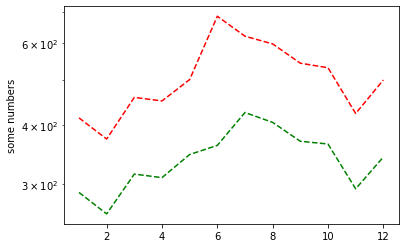